In [1]:
# Importações
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from data.load_datasets import selecionar_dataset_e_classe
from models.train_model import treinar_modelo
from explanations.pi_explanation import analisar_instancias, contar_features_relevantes


In [2]:
# Carregar o dataset e definir o problema binário
nome_dataset, classe_0_nome, X, y, class_names = selecionar_dataset_e_classe()

# Verificar o dataset carregado
print(f"Dataset: {nome_dataset}")
print(f"Classe 0: {classe_0_nome}")
print(f"Classes disponíveis: {class_names}")
print(f"Total de amostras: {X.shape[0]}")
print(f"Número de atributos: {X.shape[1]}")


    |  ************************* MENU ***************************  |
    |  0 - iris                     |  1 - pima_indians_diabetes   |
    |  2 - heart_disease            |  3 - breast_cancer          |
    |  4 - parkinsons               |  5 - mnist                  |
    |  6 - fashion_mnist            |  7 - cifar10                |
    |  8 - letter_recognition       |  9 - covertype              |
    |  Q - SAIR                                                   |
    |-------------------------------------------------------------|
    

Classes disponíveis:
   [0] - setosa
   [1] - versicolor
   [2] - virginica

🔹 **Definição do problema binário:**
    Classe `versicolor` será a classe `0`
    Classes `['setosa', 'virginica']` serão agrupadas na classe `1`

Dataset: iris
Classe 0: versicolor
Classes disponíveis: ['setosa' 'versicolor' 'virginica']
Total de amostras: 150
Número de atributos: 4


In [3]:
# Treinar o modelo original
modelo_original, X_test, y_test = treinar_modelo(X, y, classe_0=0)

# Converter X_test para DataFrame do Pandas
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])

# Converter y_test para array NumPy
if not isinstance(y_test, np.ndarray):
    y_test = np.array(y_test)

# Filtrar o conjunto de teste para incluir apenas instâncias da classe 0
X_test_classe_0 = X_test[y_test == 0]
y_test_classe_0 = y_test[y_test == 0]

# Obter as PI-explicações apenas para a classe 0
TUDO_classe_0 = analisar_instancias(X_test_classe_0, y_test_classe_0, class_names, modelo_original, X)

# Contar features relevantes apenas para a classe 0
contar_features_relevantes(TUDO_classe_0)


Instância 0:
Classe verdadeira (binária): 0
PI-Explicação: 
- petal width (cm) - 0.3
- sepal width (cm) - 3.8
- petal length (cm) - 1.7

Instância 1:
Classe verdadeira (binária): 0
PI-Explicação: 
- sepal width (cm) - 2.6
- petal length (cm) - 6.9

Instância 2:
Classe verdadeira (binária): 0
PI-Explicação: 
- petal width (cm) - 0.4
- sepal width (cm) - 3.4
- petal length (cm) - 1.5

Instância 3:
Classe verdadeira (binária): 0
PI-Explicação: 
- sepal width (cm) - 3.1
- petal length (cm) - 5.1

Instância 4:
Classe verdadeira (binária): 0
PI-Explicação: 
- sepal width (cm) - 3.2
- petal length (cm) - 5.1

Instância 5:
Classe verdadeira (binária): 0
PI-Explicação: 
- sepal width (cm) - 3.0
- petal width (cm) - 0.1

Instância 6:
Classe verdadeira (binária): 0
PI-Explicação: 
- petal width (cm) - 0.2
- sepal width (cm) - 3.5
- petal length (cm) - 1.3

Instância 7:
Classe verdadeira (binária): 0
PI-Explicação: 
- sepal width (cm) - 3.1
- petal width (cm) - 0.1

Instância 8:
Classe verdadeira

In [4]:
# Extrair as features relevantes e suas contagens (apenas para a classe 0)
features_relevantes_classe_0 = {}
for item in TUDO_classe_0:
    if isinstance(item, list):
        for feature in item:
            nome_feature = feature.split(" - ")[0]
            if nome_feature in features_relevantes_classe_0:
                features_relevantes_classe_0[nome_feature] += 1
            else:
                features_relevantes_classe_0[nome_feature] = 1

# Ordenar as features por relevância (da mais relevante para a menos relevante)
features_ordenadas_classe_0 = sorted(features_relevantes_classe_0.items(), key=lambda x: x[1], reverse=True)

# Mostrar as features em ordem de relevância (apenas para a classe 0)
print("Features ordenadas por relevância (classe 0):")
for i, (feature, contagem) in enumerate(features_ordenadas_classe_0, start=1):
    print(f"{i}. {feature}: {contagem} vezes")

Features ordenadas por relevância (classe 0):
1. sepal width (cm): 21 vezes
2. petal length (cm): 16 vezes
3. petal width (cm): 11 vezes


In [5]:
# Escolher features para remover por número
escolhas = input("Digite os números das features que deseja remover (separados por vírgula): ").split(",")
escolhas = [int(e.strip()) for e in escolhas]

# Mapear os números escolhidos para as features correspondentes
features_para_remover = [features_ordenadas_classe_0[i-1][0] for i in escolhas]
print(f"\nFeatures escolhidas para remover: {features_para_remover}")

# Criar um novo conjunto de dados sem as features removidas
X_reduzido = X.drop(columns=features_para_remover)
print(f"Novo conjunto de dados com as features removidas: {features_para_remover}")


Features escolhidas para remover: ['sepal width (cm)', 'petal length (cm)']
Novo conjunto de dados com as features removidas: ['sepal width (cm)', 'petal length (cm)']


In [16]:
print(X_reduzido)

     sepal width (cm)  petal width (cm)
0                 3.5               0.2
1                 3.0               0.2
2                 3.2               0.2
3                 3.1               0.2
4                 3.6               0.2
..                ...               ...
145               3.0               2.3
146               2.5               1.9
147               3.0               2.0
148               3.4               2.3
149               3.0               1.8

[150 rows x 2 columns]


In [6]:
# Função para calcular a validação cruzada
def validacao_cruzada(X, y, cv=5):
    modelo = LogisticRegression(max_iter=1000)
    scores = cross_val_score(modelo, X, y, cv=cv, scoring='accuracy')
    return scores.mean()

# Calcular a acurácia com validação cruzada para o modelo original
acuracia_original = validacao_cruzada(X, y)
print(f"Acurácia do modelo original (validação cruzada): {acuracia_original:.4f}")

# Calcular a acurácia com validação cruzada para o modelo reduzido
acuracia_reduzido = validacao_cruzada(X_reduzido, y)
print(f"Acurácia do modelo reduzido (validação cruzada): {acuracia_reduzido:.4f}")

Acurácia do modelo original (validação cruzada): 0.6800
Acurácia do modelo reduzido (validação cruzada): 0.5467


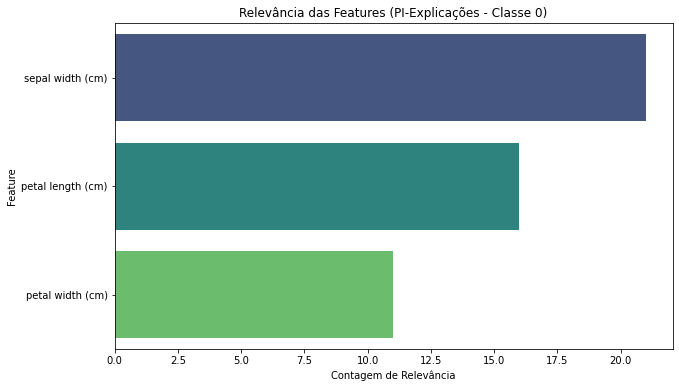

In [7]:
# Gráfico de barras para a relevância das features (classe 0)
plt.figure(figsize=(10, 6))
sns.barplot(x=[f[1] for f in features_ordenadas_classe_0], y=[f[0] for f in features_ordenadas_classe_0], palette="viridis")
plt.title("Relevância das Features (PI-Explicações - Classe 0)")
plt.xlabel("Contagem de Relevância")
plt.ylabel("Feature")
plt.show()

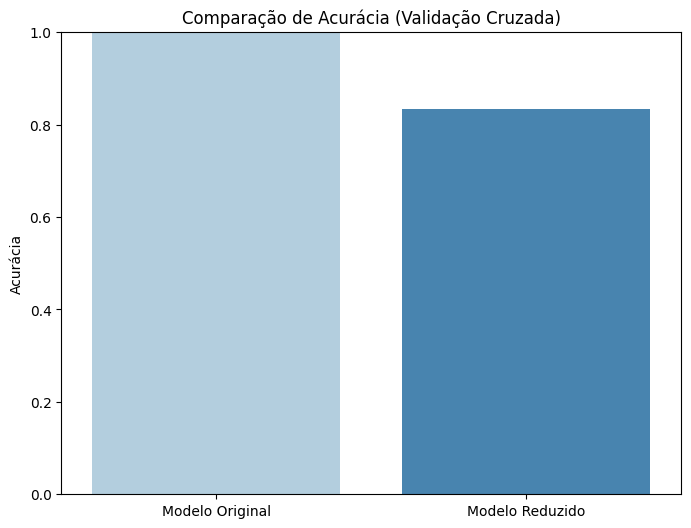

In [54]:
# Gráfico de comparação de acurácia
plt.figure(figsize=(8, 6))
sns.barplot(x=["Modelo Original", "Modelo Reduzido"], y=[acuracia_original, acuracia_reduzido], palette="Blues")
plt.title("Comparação de Acurácia (Validação Cruzada)")
plt.ylabel("Acurácia")
plt.ylim(0, 1)
plt.show()

Gráficos de dispersão para o dataset original:


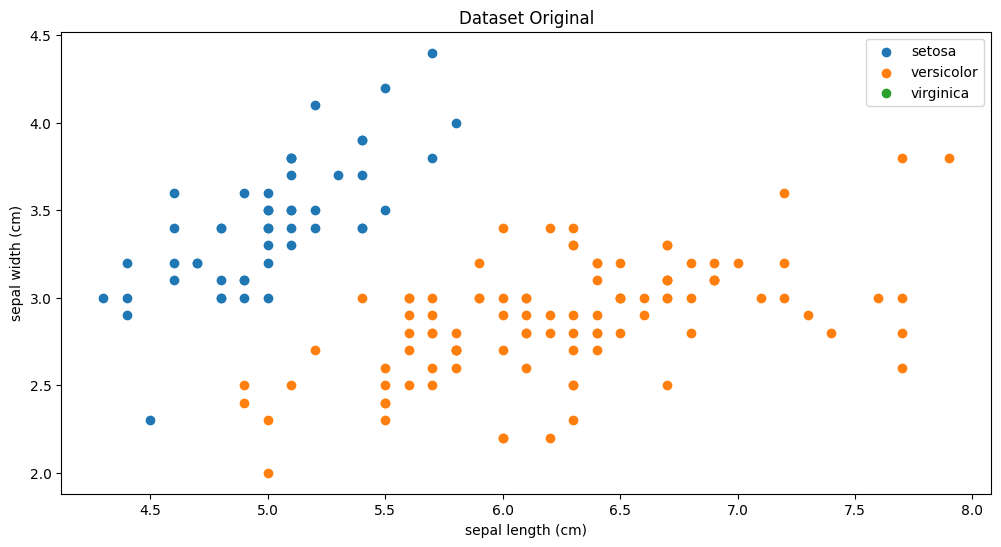

Gráficos de dispersão para o dataset reduzido:


IndexError: single positional indexer is out-of-bounds

<Figure size 1200x600 with 0 Axes>

In [55]:
# Função para plotar gráficos de dispersão
def plot_scatter(X, y, class_names, title):
    plt.figure(figsize=(12, 6))
    
    # Plotar cada classe
    for i, class_name in enumerate(class_names):
        plt.scatter(X[y == i].iloc[:, 0], X[y == i].iloc[:, 1], label=class_name)
    
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.legend()
    plt.show()

# Plotar gráficos de dispersão para o dataset original
print("Gráficos de dispersão para o dataset original:")
plot_scatter(X, y, class_names, "Dataset Original")

# Plotar gráficos de dispersão para o dataset reduzido (sem a feature removida)
print("Gráficos de dispersão para o dataset reduzido:")
plot_scatter(X_reduzido, y, class_names, "Dataset Reduzido")